<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_06/lab_06.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [235]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [236]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_06/data/anscombe.csv")

df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

# **Desarrollo:**

**1. Gráfique mediante un gráfico tipo scatter cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?**

In [237]:
#Separo los grupos
grafico1= df[df['grupo']== 'Grupo_1']
grafico2= df[df['grupo']== 'Grupo_2']
grafico3= df[df['grupo']== 'Grupo_3']
grafico4= df[df['grupo']== 'Grupo_4']

In [238]:
grafico4

,x,y,grupo
33,8,6.58,Grupo_4
34,8,5.76,Grupo_4
35,8,7.71,Grupo_4
36,8,8.84,Grupo_4
37,8,8.47,Grupo_4
38,8,7.04,Grupo_4
39,8,5.25,Grupo_4
40,19,12.50,Grupo_4
41,8,5.56,Grupo_4
42,8,7.91,Grupo_4


Text(0.5, 1.0, 'Grupo 4')

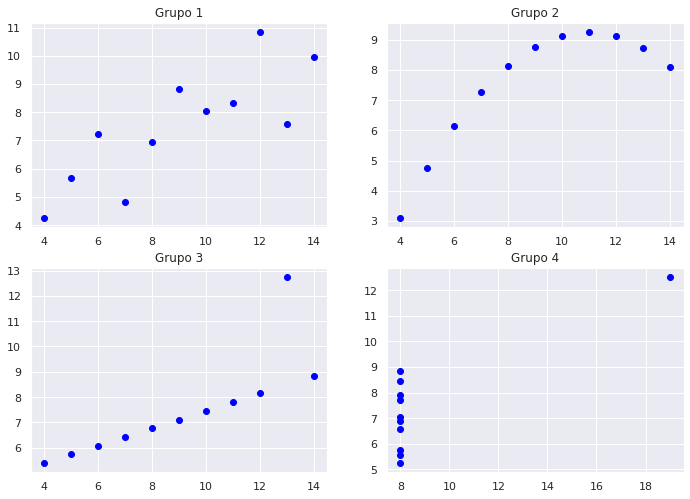

In [239]:
plt.subplot(221) #para poner los 4 juntos
plt.scatter(grafico1['x'],grafico1['y'],color='blue') #creo los graficos
plt.title('Grupo 1')

plt.subplot(222)
plt.scatter(grafico2['x'],grafico2['y'],color='blue')
plt.title('Grupo 2')

plt.subplot(223)
plt.scatter(grafico3['x'],grafico3['y'],color='blue')
plt.title('Grupo 3')

plt.subplot(224)
plt.scatter(grafico4['x'],grafico4['y'],color='blue')
plt.title('Grupo 4')

Si , los grupos son muy distintos entre si

**2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando describe para cada grupo. Interprete.**


In [240]:
print('Grupo_1')
print(df.loc[df['grupo']== 'Grupo_1'].describe())
print('Grupo_2')
print(df.loc[df['grupo']== 'Grupo_2'].describe())
print('Grupo_3')
print(df.loc[df['grupo']== 'Grupo_3'].describe())
print('Grupo_4')
print(df.loc[df['grupo']== 'Grupo_4'].describe())
   

Grupo_1
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
Grupo_2
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
Grupo_3
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
Grupo_4
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000

los grupos presentan medidas de tendencias similares debido a la distribucion de sus datos a pesar de que graficamente sean distintos.


**3.Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.**

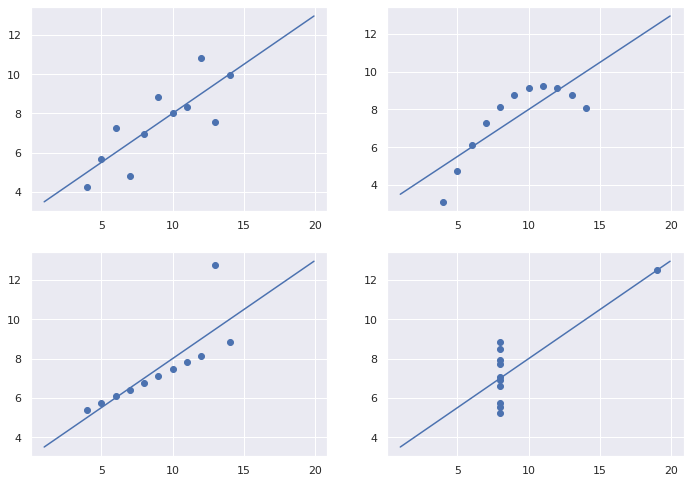

In [241]:
from sklearn.linear_model import LinearRegression
list=[[grafico1['x'],grafico1['y']],[grafico2['x'],grafico2['y']],[grafico3['x'],grafico3['y']],[grafico4['x'],grafico4['y']]]
model_rl = LinearRegression() # Creando el modelo.
for i in range(0,4):
    model_rl.fit(pd.DataFrame(list[i][0]),pd.DataFrame(list[i][1]))
    beta_0 = model_rl.intercept_
    beta_1 = model_rl.coef_[0]
    
    plt.subplot(2,2,i+1)
    plt.scatter(list[i][0],list[i][1])
    x_range = np.arange(1,20,0.1)
    plt.plot(x_range,beta_0+beta_1*x_range)

Los grupos 1 y 3 presentan concordancia con el ajuste lineal \\
El grupo 2, se parece a una parabola por lo que seria mejor un ajuste polinomial \\
El grupo 4 a una lineal vertical, por lo que el ajuste no es adecuado.

4.**Calcule los resultados de las métricas para cada grupo. Interprete** 

In [242]:
# Grupo 1
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lista=[]
for i in model_rl.predict(pd.DataFrame(grafico1['x'])).tolist():
    lista.append(i[0])
lista
#funcion para el Smape
def estimate_coef(x,y):
  promx= np.mean(x) #promedio de x
  promy= np.mean(y) #promedio de y
  dif2=(x-promx)**2 
  dif=(x-promx)*(y-promy)
  suma= np.sum(dif)
  suma2= np.sum(dif2)
  beta_1= suma/suma2
  beta_0= promy-beta_1*promx
  return (beta_0, beta_1)

beta_estimado = estimate_coef(grafico1['x'], grafico1['y'])
prediccion = beta_estimado[0] + beta_estimado[1]*grafico1['x']

n = len(grafico1['y'])
x= ((grafico1['y'])**2+(prediccion)**2)/2 #denominador de la sumatoria
x1= np.abs(grafico1['y']-prediccion) #numerador de la sumatoria
div= x1/x
smape = (np.sum(div))/n
# --------------------
MAPE=mean_absolute_percentage_error(grafico1['y'], lista)
R2= r2_score(grafico1['y'], lista)
MAE= mean_absolute_error(grafico1['y'], lista)
MSE= mean_squared_error(grafico1['y'], lista)
RMSE= mean_squared_error(grafico1['y'],lista, squared=False)

print('Grupo 1')
print('mape:')
print(MAPE)
print('r2:')
print(R2)
print('mae:')
print(MAE)
print('mse:')
print(MSE)
print('rmse:')
print(RMSE)
print('smape:')
print(smape)


Grupo 1
mape:
0.12125362425917147
r2:
0.6665423714029703
mae:
0.8373057851239668
mse:
1.2511539669421492
rmse:
1.1185499394046514
smape:
0.017090017093981013


In [243]:
lista=[]
for i in model_rl.predict(pd.DataFrame(grafico2['x'])).tolist():
    lista.append(i[0])
lista
#funcion para el Smape
def estimate_coef(x,y):
  promx= np.mean(x) #promedio de x
  promy= np.mean(y) #promedio de y
  dif2=(x-promx)**2 
  dif=(x-promx)*(y-promy)
  suma= np.sum(dif)
  suma2= np.sum(dif2)
  beta_1= suma/suma2
  beta_0= promy-beta_1*promx
  return (beta_0, beta_1)

beta_estimado = estimate_coef(grafico2['x'], grafico2['y'])
prediccion = beta_estimado[0] + beta_estimado[1]*grafico2['x']

n = len(grafico2['y'])
x= ((grafico2['y'])**2+(prediccion)**2)/2 #denominador de la sumatoria
x1= np.abs(grafico2['y']-prediccion) #numerador de la sumatoria
div= x1/x
smape = (np.sum(div))/n
# --------------------
MAPE=mean_absolute_percentage_error(grafico2['y'], lista)
R2= r2_score(grafico2['y'], lista)
MAE= mean_absolute_error(grafico2['y'], lista)
MSE= mean_squared_error(grafico2['y'], lista)
RMSE= mean_squared_error(grafico2['y'],lista, squared=False)

print('Grupo 2')
print('mape:')
print(MAPE)
print('r2:')
print(R2)
print('mae:')
print(MAE)
print('mse:')
print(MSE)
print('rmse:')
print(RMSE)
print('smape:')
print(smape)

Grupo 2
mape:
0.15696135031224573
r2:
0.6662420117029542
mae:
0.9679338842975208
mse:
1.2523901652892564
rmse:
1.1191023926742611
smape:
0.023245541223740174


In [244]:
lista=[]
for i in model_rl.predict(pd.DataFrame(grafico3['x'])).tolist():
    lista.append(i[0])
lista
#funcion para el Smape
def estimate_coef(x,y):
  promx= np.mean(x) #promedio de x
  promy= np.mean(y) #promedio de y
  dif2=(x-promx)**2 
  dif=(x-promx)*(y-promy)
  suma= np.sum(dif)
  suma2= np.sum(dif2)
  beta_1= suma/suma2
  beta_0= promy-beta_1*promx
  return (beta_0, beta_1)

beta_estimado = estimate_coef(grafico3['x'], grafico3['y'])
prediccion = beta_estimado[0] + beta_estimado[1]*grafico3['x']

n = len(grafico3['y'])
x= ((grafico3['y'])**2+(prediccion)**2)/2 #denominador de la sumatoria
x1= np.abs(grafico3['y']-prediccion) #numerador de la sumatoria
div= x1/x
smape = (np.sum(div))/n
# --------------------
MAPE=mean_absolute_percentage_error(grafico3['y'], lista)
R2= r2_score(grafico3['y'], lista)
MAE= mean_absolute_error(grafico3['y'], lista)
MSE= mean_squared_error(grafico3['y'], lista)
RMSE= mean_squared_error(grafico3['y'],lista, squared=False)

print('Grupo 3')
print('mape:')
print(MAPE)
print('r2:')
print(R2)
print('mae:')
print(MAE)
print('mse:')
print(MSE)
print('rmse:')
print(RMSE)
print('smape:')
print(smape)

Grupo 3
mape:
0.07977942248962798
r2:
0.6663237323484936
mae:
0.7164793388429751
mse:
1.250564049586776
rmse:
1.1182862109436815
smape:
0.009769328725785164


In [245]:
lista=[]
for i in model_rl.predict(pd.DataFrame(grafico4['x'])).tolist():
    lista.append(i[0])
lista
#funcion para el Smape
def estimate_coef(x,y):
  promx= np.mean(x) #promedio de x
  promy= np.mean(y) #promedio de y
  dif2=(x-promx)**2 
  dif=(x-promx)*(y-promy)
  suma= np.sum(dif)
  suma2= np.sum(dif2)
  beta_1= suma/suma2
  beta_0= promy-beta_1*promx
  return (beta_0, beta_1)

beta_estimado = estimate_coef(grafico4['x'], grafico4['y'])
prediccion = beta_estimado[0] + beta_estimado[1]*grafico4['x']

n = len(grafico4['y'])
x= ((grafico4['y'])**2+(prediccion)**2)/2 #denominador de la sumatoria
x1= np.abs(grafico4['y']-prediccion) #numerador de la sumatoria
div= x1/x
smape = (np.sum(div))/n
# --------------------
MAPE=mean_absolute_percentage_error(grafico4['y'], lista)
R2= r2_score(grafico4['y'], lista)
MAE= mean_absolute_error(grafico4['y'], lista)
MSE= mean_squared_error(grafico4['y'], lista)
RMSE= mean_squared_error(grafico4['y'],lista, squared=False)

print('Grupo 4')
print('mape:')
print(MAPE)
print('r2:')
print(R2)
print('mae:')
print(MAE)
print('mse:')
print(MSE)
print('rmse:')
print(RMSE)
print('smape:')
print(smape)

Grupo 4
mape:
0.13473848647069778
r2:
0.6667072568984653
mae:
0.902727272727273
mse:
1.249317272727273
rmse:
1.1177286221293936
smape:
0.0188020540085755


Podemos observar que para los 4 grupos el r2 es cercano y el rmse es alto por lo que su ajuste no es el mejor , el Smape es mas bajo en el grupo 3 esto se debe a que si bien los datos siguen un tendencia lineal debe haber un outlier.

5.**Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario**.


*   El Grupo 1 no presenta un ajuste parecido a ningun modelo previo visto por lo que permanecera con ese ajuste lineal.
*   En la grafica del grupo 2 se observa una forma de parabola por lo que se opto por realizar un ajuste polinomial
*   Para el grupo 3 y 4  se elimino el outliers y se mantuvo el ajuste.







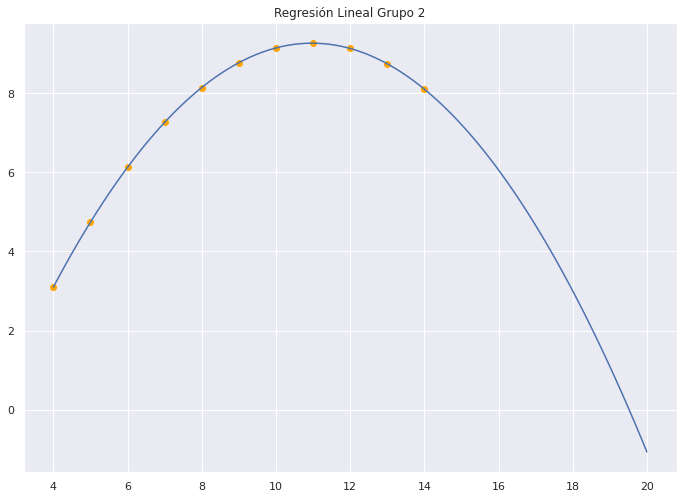

In [246]:
from sklearn.preprocessing import PolynomialFeatures

X = grafico2.x
y = grafico2.y
mymodel = numpy.poly1d(numpy.polyfit(X, y, 2))

myline = numpy.linspace(4, 20, 100)

plt.title('Regresión Lineal Grupo 2')
plt.scatter(X, y,color="orange")
plt.plot(myline, mymodel(myline))
plt.show()


In [247]:
print('R2 grupo 2')
r2_score(y, mymodel(X))

R2 grupo 2


0.999999457857722

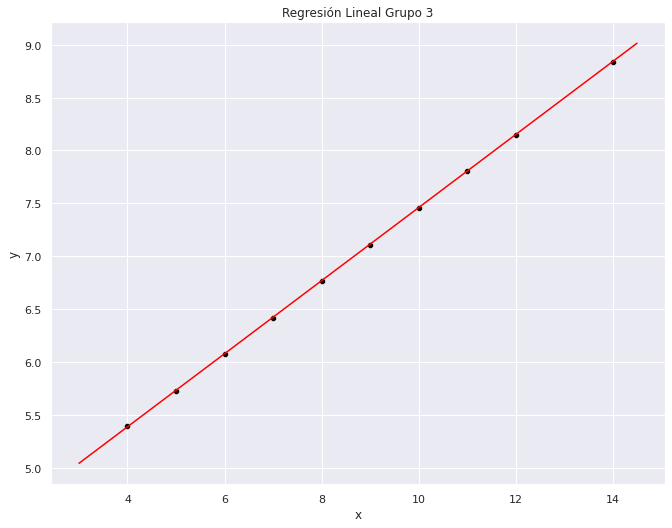

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

mask= grafico3["y"]<12 ##elimina outlaier
data= grafico3[mask]
X = data[["x"]]
y = data[["y"]]

model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X, y) 
# graficos con seaborn

beta_0 = model_rl.intercept_[0]
beta_1 = model_rl.coef_[0]

x_range = np.arange(3,15,0.5)

df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1[0]*n for n in x_range]})

df2 = pd.DataFrame({'x':X['x'],'y_true':y['y']})

fig, ax = plt.subplots(figsize=(11, 8.5))


sns.scatterplot(x='x', y='y_true', data=df2, ax=ax,color="black")
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.title('Regresión Lineal Grupo 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

y_pred = model_rl.predict(X)


In [249]:
print('R2 grupo 3')
r2_score(y, y_pred)

R2 grupo 3


0.999993107581533

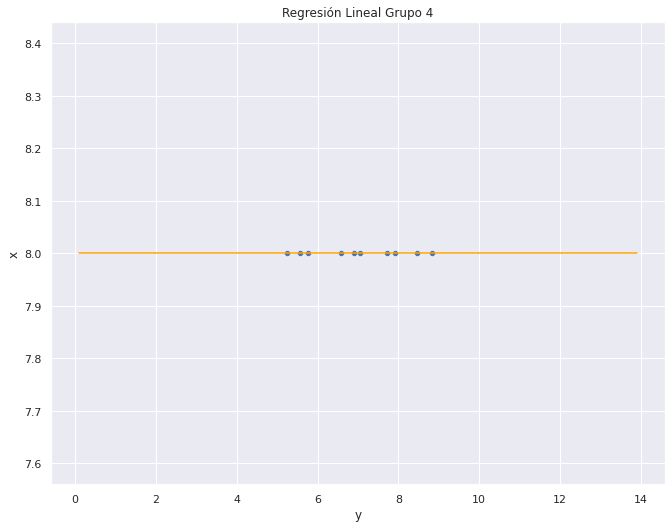

In [250]:
#Grupo4

#eliminar el outlaier
X = grafico4[['y']].drop(40,axis=0) 
y = grafico4['x'].drop(40,axis=0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rl = LinearRegression()
model_rl.fit(X_train, y_train)

x_range = np.arange(0.1,14,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[model_rl.intercept_+ model_rl.coef_[0]*n for n in x_range]})
  
df = pd.DataFrame({'x':X['y'],'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="orange")

plt.title('Regresión Lineal Grupo 4')
plt.xlabel('y')
plt.ylabel('x')
plt.show()

y_pred = model_rl.predict(X)


In [251]:
print('R2 grupo 4')
r2_score(y, y_pred)

R2 grupo 4


1.0

El grafico del grupo 4 se rotó para un mejor ajuste.